## Loading Data & Visualizations

Goals:
- Get data
- Inspect data
- The .pipe method

#### Loading Data

In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed


In [5]:
raw

Price           Close                   High                    Low  \
Ticker           AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.440333   86.026459   6.455079   86.072002   6.391280   
2010-01-05   6.451467   86.254189   6.487880   86.292145   6.417460   
2010-01-06   6.348847   86.314873   6.477046   86.527414   6.342226   
2010-01-07   6.337108   86.679268   6.379841   86.785539   6.291065   
2010-01-08   6.379241   86.967728   6.379844   87.005684   6.291369   
...               ...         ...        ...         ...        ...   
2019-12-23  68.757652  297.810944  68.818178  298.209600  67.878812   
2019-12-24  68.823036  297.820190  68.973147  298.089036  68.496201   
2019-12-26  70.188469  299.405548  70.205418  299.414828  68.927107   
2019-12-27  70.161858  299.331390  71.171436  300.202890  69.755124   
2019-12-30  70.578293  297.681091  70.861558  299.553901  69.053038   

Price                        Open                 Volume             
Ticker             SPY       AAPL         SPY       AAPL        SPY  
Date                                                                 
2010-01-04   84.644935   6.422879   85.297743  493729600  118944600  
2010-01-05   85.662108   6.458087   85.973333  601904800  111579900  
2010-01-06   86.102332   6.451466   86.170646  552160000  116074400  
2010-01-07   85.912596   6.372318   86.155501  477131200  131091100  
2010-01-08   86.276968   6.328684   86.451553  447610800  126402800  
...                ...        ...         ...        ...        ...  
2019-12-23  297.662600  67.917550  298.153975   98572000   52990000  
2019-12-24  297.514224  68.924723  298.042691   48478800   20270000  
2019-12-26  298.200298  68.956159  298.209550   93121200   30911200  
2019-12-27  298.793671  70.481437  300.147264  146266000   42528800  
2019-12-30  297.189717  70.079558  299.414838  144114400   49729100  

[2515 rows x 10 columns]

In [6]:
raw.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'SPY'),
            (  'High', 'AAPL'),
            (  'High',  'SPY'),
            (   'Low', 'AAPL'),
            (   'Low',  'SPY'),
            (  'Open', 'AAPL'),
            (  'Open',  'SPY'),
            ('Volume', 'AAPL'),
            ('Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [7]:
# Going to use the .pipe method a lot
raw.pipe?

Signature:
raw.pipe(
    func: 'Callable[..., T] | tuple[Callable[..., T], str]',
    *args,
    **kwargs,
) -> 'T'
Docstring:
Apply chainable functions that expect Series or DataFrames.

Parameters
----------
func : function
    Function to apply to the Series/DataFrame.
    ``args``, and ``kwargs`` are passed into ``func``.
    Alternatively a ``(callable, data_keyword)`` tuple where
    ``data_keyword`` is a string indicating the keyword of
    ``callable`` that expects the Series/DataFrame.
*args : iterable, optional
    Positional arguments passed into ``func``.
**kwargs : mapping, optional
    A dictionary of keyword arguments passed into ``func``.

Returns
-------
the return type of ``func``.

See Also
--------
DataFrame.apply : Apply a function along input axis of DataFrame.
DataFrame.map : Apply a function elementwise on a whole DataFrame.
Series.map : Apply a mapping correspondence on a
    :class:`~pandas.Series`.

Notes
-----
Use ``.pipe`` when chaining together functions t

In [8]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
 .iloc[:,::2]
 .pipe(fix_cols)
)

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440333,6.455079,6.391280,6.422879,493729600
2010-01-05,6.451467,6.487880,6.417460,6.458087,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337108,6.379841,6.291065,6.372318,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800
...,...,...,...,...,...
2019-12-23,68.757652,68.818178,67.878812,67.917550,98572000
2019-12-24,68.823036,68.973147,68.496201,68.924723,48478800
2019-12-26,70.188469,70.205418,68.927107,68.956159,93121200


**Understanding the fix_cols function**
- This function extracts the first element from each column name and sets it as the new column name.
- It assumes that the column names are tuples or lists (multi-indexed columns).

**Applying .iloc[:, ::2]**
- iloc[:, ::2]: This selects every second column (i.e., 0, 2, 4, ...).
- .pipe(fix_cols): Passes the result of .iloc into the fix_cols function.

**Overall Explanation**
- raw.iloc[:, ::2]: Selects every second column of raw.
- pipe(fix_cols): Passes the subsetted DataFrame to fix_cols, renaming columns by extracting the first element from each column name.

In [9]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

    return (raw
     .iloc[:,::2]
     .pipe(fix_cols)
    )

tweak_data()

[*********************100%***********************]  2 of 2 completed


,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440333,6.455079,6.391280,6.422879,493729600
2010-01-05,6.451467,6.487880,6.417460,6.458087,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337108,6.379841,6.291065,6.372318,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800
...,...,...,...,...,...
2019-12-23,68.757652,68.818178,67.878812,67.917550,98572000
2019-12-24,68.823036,68.973147,68.496201,68.924723,48478800
2019-12-26,70.188469,70.205418,68.927107,68.956159,93121200


## Line Plot

Goals
- Line plots
- Matplotlib plots

In [14]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed


In [15]:
(raw
 .iloc[:,:-2:2]
 .pipe(fix_cols)
)

,Close,High,Low,Open
Date,,,,
2010-01-04,6.440333,6.455079,6.391280,6.422879
2010-01-05,6.451467,6.487880,6.417460,6.458087
2010-01-06,6.348847,6.477046,6.342226,6.451466
2010-01-07,6.337108,6.379841,6.291065,6.372318
2010-01-08,6.379241,6.379844,6.291369,6.328684
...,...,...,...,...
2019-12-23,68.757652,68.818178,67.878812,67.917550
2019-12-24,68.823036,68.973147,68.496201,68.924723
2019-12-26,70.188469,70.205418,68.927107,68.956159


<Axes: xlabel='Date'>

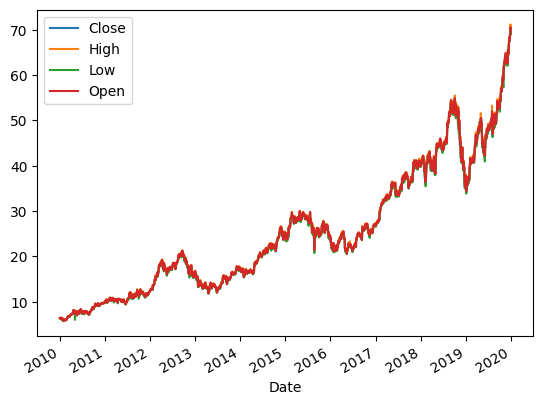

In [16]:
(raw
 .iloc[:,:-2:2]
 .pipe(fix_cols)
 .plot()
)

<Axes: xlabel='Date'>

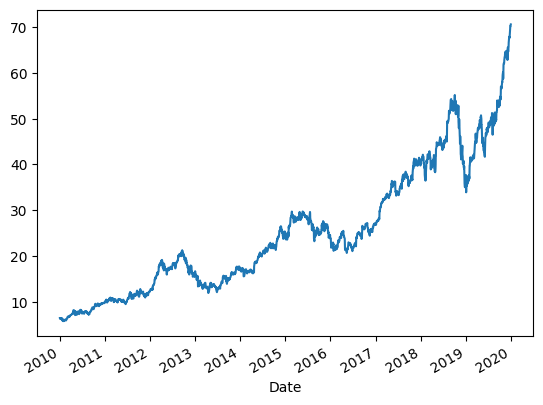

In [17]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

<Axes: xlabel='Date'>

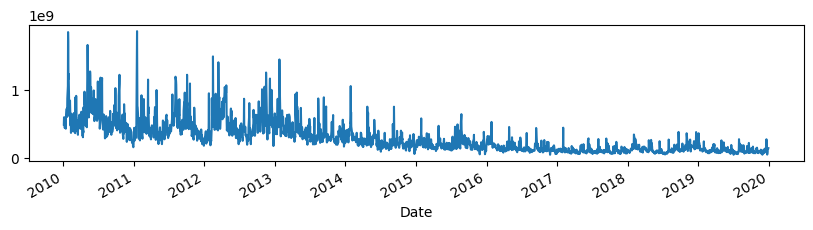

In [19]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10,2))
)

## Resampling

<Axes: xlabel='Date'>

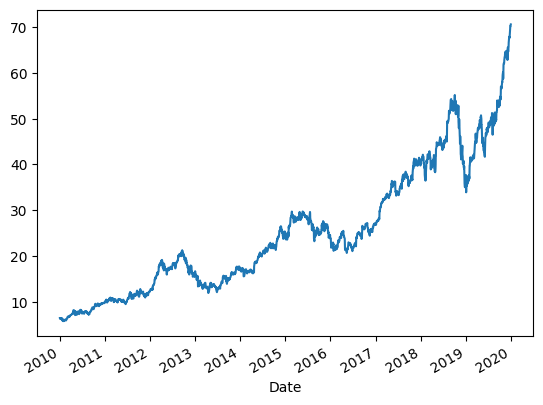

In [20]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

In [21]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
)

Date
2010-01-04     6.440333
2010-01-05     6.451467
2010-01-06     6.348847
2010-01-07     6.337108
2010-01-08     6.379241
                ...    
2019-12-23    68.757652
2019-12-24    68.823036
2019-12-26    70.188469
2019-12-27    70.161858
2019-12-30    70.578293
Name: Close, Length: 2515, dtype: float64

In [23]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19576\3920485667.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


In [24]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
 .mean()
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19576\3987136314.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


Date
2010-01-31     6.250899
2010-02-28     5.982481
2010-03-31     6.723237
2010-04-30     7.557964
2010-05-31     7.567381
                ...    
2019-08-31    49.422592
2019-09-30    52.619580
2019-10-31    56.793402
2019-11-30    63.520146
2019-12-31    66.740809
Freq: ME, Name: Close, Length: 120, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_19576\1015692560.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M') #offset alias


<Axes: xlabel='Date'>

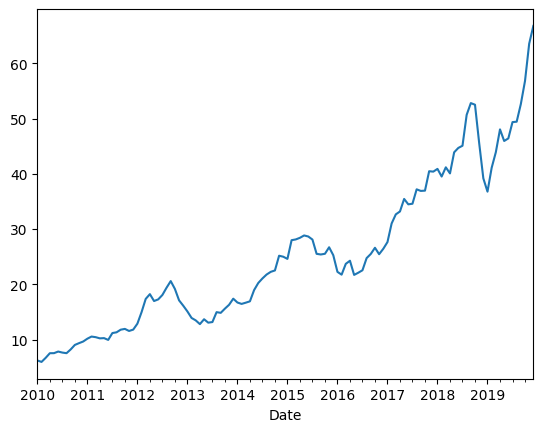

In [25]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
 .mean()
 .plot()
)

## Candlestick Plot